# MALIGNANT COMMENTS CLASSIFICATION

Problem Statement:

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.  

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.  

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly off-ensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 

In [ ]:
!sudo apt install nvidia-driver-470  # or nvidia-driver-495

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Some packages could not be installed. This may mean that you have
requested an impossible situation or if you are using the unstable
distribution that some required packages have not yet been created
or been moved out of Incoming.
The following information may help to resolve the situation:

The following packages have unmet dependencies:
 nvidia-driver-470 : Depends: libnvidia-gl-470 (= 470.103.01-0ubuntu1) but it is not going to be installed
                     Depends: nvidia-dkms-470 (= 470.103.01-0ubuntu1)
                     Depends: nvidia-kernel-source-470 (= 470.103.01-0ubuntu1) but it is not going to be installed
                     Depends: libnvidia-compute-470 (= 470.103.01-0ubuntu1) but it is not going to be installed
                     Depends: libnvidia-extra-470 (= 470.103.01-0ubuntu1) but it is not going to be installed
                     Depends: nvidia-compute-util

for RAM increase

In [ ]:
a = []
while 1:
    a.append("1")

In [1]:
!nvidia-smi

Thu May 19 07:06:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU

GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
    process = psutil.Process(os.getpid())
    print("Gen RAM Free: " + humanize.naturalsize(psutil.virtual_memory().available), " |     Proc size: " + humanize.naturalsize(process.memory_info().rss))
    print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total     {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.0 GB  |     Proc size: 94.8 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total     15109MB


In [2]:
from google.colab import files
import pandas as pd
df_train = pd.read_csv('/content/drive/MyDrive/project/comment classifier/Malignant Comments Classifier Project/train.csv')
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
df_test = pd.read_csv('/content/drive/MyDrive/project/comment classifier/Malignant Comments Classifier Project/test.csv')
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


# Exploratory Data Analysis

In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df_train.shape

(159571, 8)

We have 159571 Rows and 8 Columns in our dataframe

In [7]:
df_test.describe

<bound method NDFrame.describe of                       id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]>

In [8]:
df_test.shape

(153164, 2)

In [9]:
df_train.describe

<bound method NDFrame.describe of                       id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant

In [10]:
df_train.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

# Column Description:

id : A unique id aligned with each comment text.

comment_text : It includes the comment text.

malignant : It is a column with binary values depicting which comments are malignant in nature.

highly_malignant : Binary column with labels for highly malignant text.

rude : Binary column with labels for comments that are rude in nature.

threat : Binary column with labels for threatening context in the comments.

abuse : Binary column with labels with abusive behaviour.

loathe : Label to comments that are full of loathe and hatred.

In [11]:
df_test.isnull().sum()

id              0
comment_text    0
dtype: int64

In [12]:
df_train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [13]:
dfcorr=df_train.corr()
df_train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


In [22]:
import numpy as np
#from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
import missingno
import pandas_profiling
from scipy import interp
from itertools import cycle
import matplotlib.ticker as plticker

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [15]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt4', 'qt5', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl', 'widget']


In [16]:
!pip install matplotlib
!pip install seaborn
%matplotlib notebook
!pip install plotly
import plotly.express as px

In [17]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

In [21]:
plt.style.use('classic')

In [26]:
! sudo apt-get install tcl-dev tk-dev python-tk python3-tk
# use code if not able to get plot(graph)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tcl-dev is already the newest version (8.6.0+9).
tk-dev is already the newest version (8.6.0+9).
python-tk is already the newest version (2.7.17-1~18.04).
python3-tk is already the newest version (3.6.9-1~18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


                  malignant  highly_malignant      rude    threat     abuse  \
malignant          1.000000          0.308619  0.676515  0.157058  0.647518   
highly_malignant   0.308619          1.000000  0.403014  0.123601  0.375807   
rude               0.676515          0.403014  1.000000  0.141179  0.741272   
threat             0.157058          0.123601  0.141179  1.000000  0.150022   
abuse              0.647518          0.375807  0.741272  0.150022  1.000000   
loathe             0.266009          0.201600  0.286867  0.115128  0.337736   

                    loathe  
malignant         0.266009  
highly_malignant  0.201600  
rude              0.286867  
threat            0.115128  
abuse             0.337736  
loathe            1.000000  
AxesSubplot(0.125,0.125;0.62x0.775)


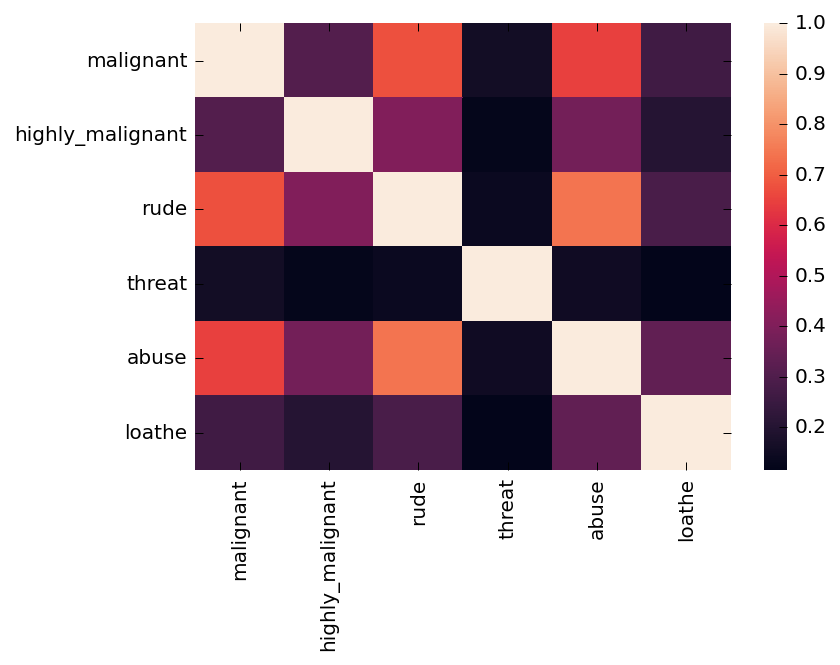

In [27]:
print(df_train.corr())
print(sns.heatmap(df_train.corr()))

In [28]:
# checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = df_train.columns[2:]

# counting non-zero rows i.e. Malignant Comments
malignant_comments = len(df_train[df_train[output_labels].any(axis=1)])

# counting rows containing zero i.e. Normal Comments
normal_comments = len(df_train)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df_train),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df_train),2)}%)")

Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


malignant
0    144277
1     15294
Name: malignant, dtype: int64


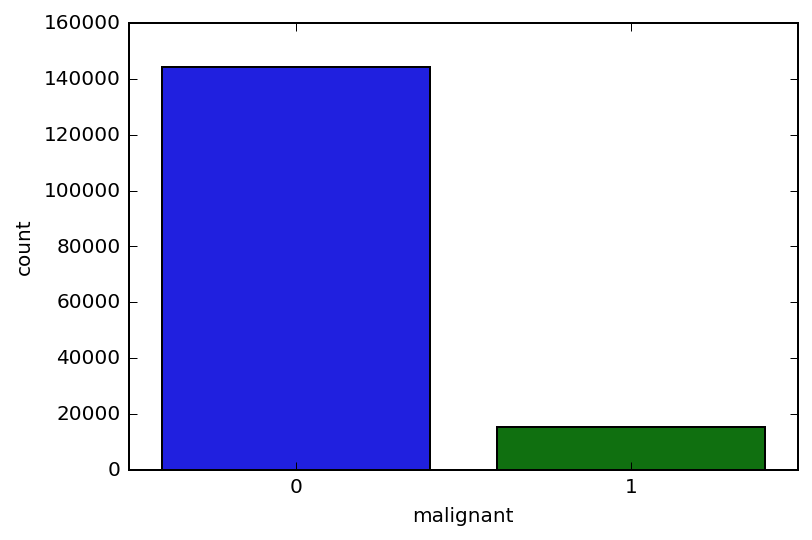

highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64


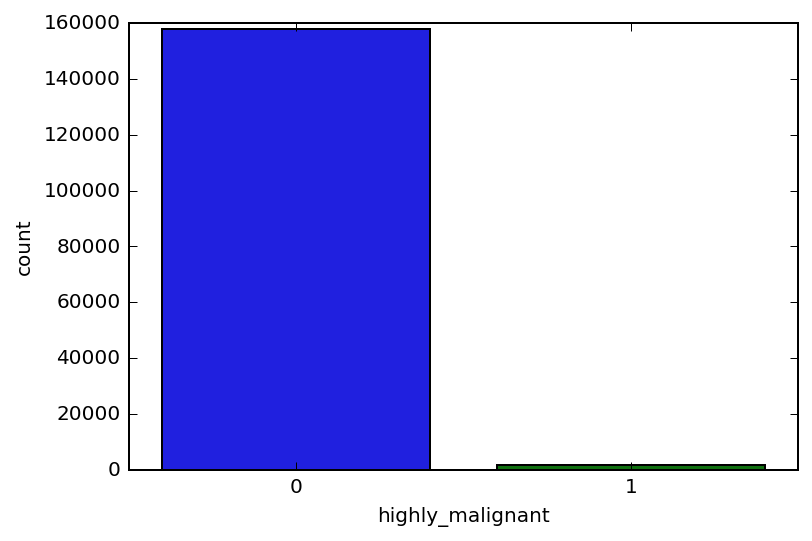

loathe
0    158166
1      1405
Name: loathe, dtype: int64


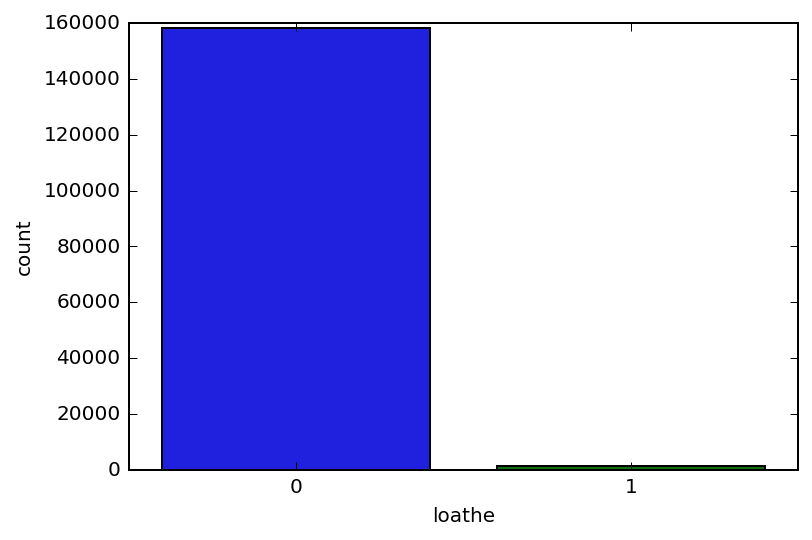

rude
0    151122
1      8449
Name: rude, dtype: int64


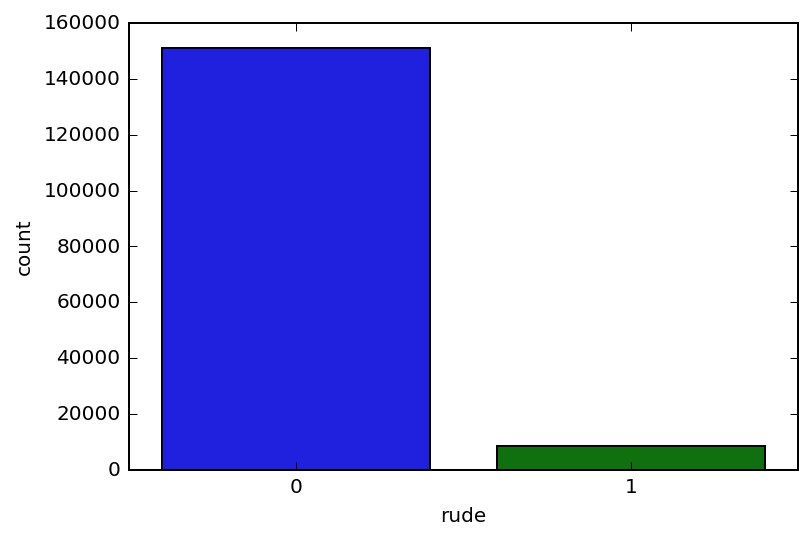

abuse
0    151694
1      7877
Name: abuse, dtype: int64


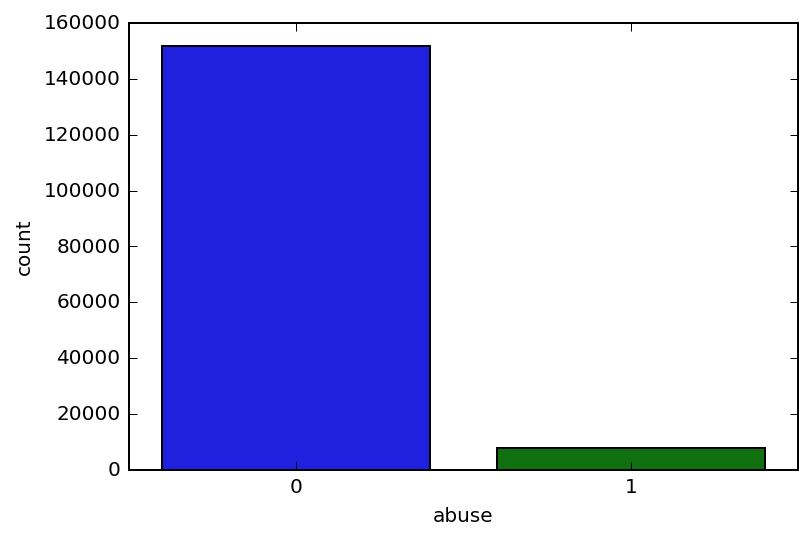

threat
0    159093
1       478
Name: threat, dtype: int64


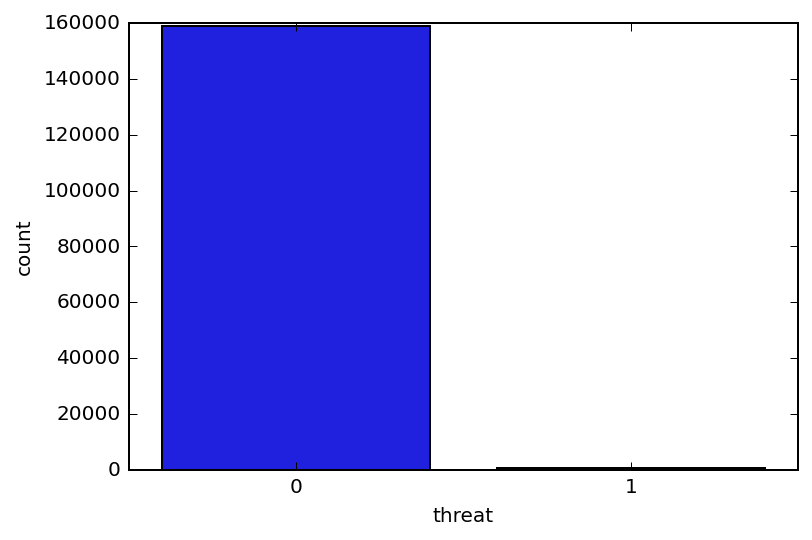

In [29]:
col = ['malignant', 'highly_malignant', 'loathe', 'rude', 'abuse', 'threat']
for i in col:
    print(i)
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

In [ ]:
!pip install nltk
!pip install wordcloud

In [ ]:
!pip install sklearn

In [30]:
import nltk
import nltk.corpus
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize


In [31]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
!pip install scikit-multilearn
!pip install scikit-plot

     |████████████████████████████████| 89 kB 5.1 MB/s 


In [33]:
import sklearn.metrics as metrics
from scikitplot.metrics import plot_roc_curve
from sklearn.ensemble import BaggingClassifier
import skmultilearn 
from skmultilearn.problem_transform import BinaryRelevance

In [34]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.sparse import csr_matrix
import timeit, sys
from sklearn import metrics
import tqdm.notebook as tqdm
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier

import xgboost
import tqdm.notebook as tqdm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
import joblib

Data description :

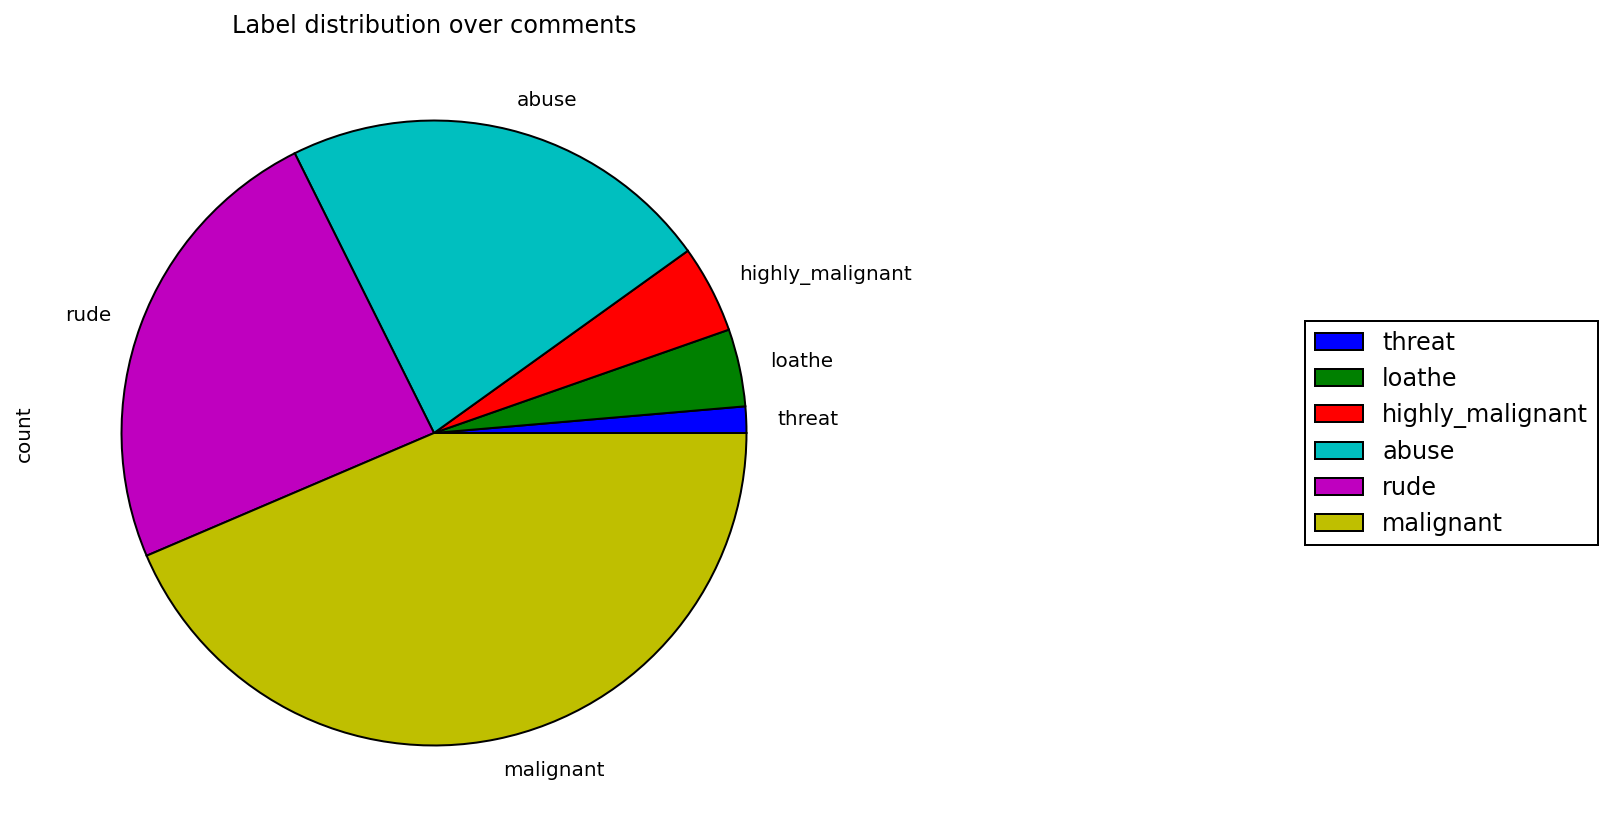

In [35]:
df_distribution = df_train[col].sum()\
                          .to_frame()\
                          .rename(columns={0: 'count'})\
                          .sort_values('count')
df_distribution.plot.pie(y = 'count', 
                         title = 'Label distribution over comments', 
                         figsize=(7,7))\
.legend(loc = 'center left', bbox_to_anchor = (1.6, 0.5))

In [36]:
# copying df_train into another object df
df = df_train.copy()

In [37]:
# Data Cleansing

# as the feature 'id' has no relevance w.r.t. model training I am dropping this column
df.drop(columns=['id'],inplace=True)
# converting comment text to lowercase format
df['comment_text'] = df.comment_text.str.lower()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0


Since there was no use of the "id" column I have dropped it and converted all the text data in our comment text column into lowercase format for easier interpretation

In [38]:
# Removing and Replacing unwanted characters in the comment_text column

# Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Removing Stop Words and Punctuations

# Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

# Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

# Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

New list of custom stop words are as follows:


{'about', 'when', "i'll", 'h', 'from', 'both', "she's", 'at', 'as', 'again', 'same', 'y', 'q', 'whom', 'before', 'of', 'isn', 'shouldn', 'off', "wouldn't", "i've", 'stfu', 'in', 'into', 'them', 'and', 'been', 'ok', 'ain', 'lmfao', "he'll", 'her', "didn't", 'v', 'lmk', 'nt', 'do', 'most', 'umm', 'themselves', 'shan', 'you', 'll', 'what', 'our', 'aren', 'ofc', 'once', 'z', 'so', 'don', 'he', 'not', "don't", 'above', 'ourselves', 'it', "should've", 'j', 'his', "it's", 'himself', 'maybe', 'than', 'after', "he's", 'on', "shan't", 'over', 'only', 'each', 'hmm', 'e', 'against', 'myself', 'r', 'which', 'an', 'some', 'having', 'those', 'herself', 't', 'rofl', "you'd", 'just', "that's", 'why', 'w', 'up', 'hadn', 'ma', 'they', 'mustn', 'o', 'x', 'lol', 'won', 'wouldn', 'hasn', 'now', "d'aww", 'here', 'nor', "mustn't", 'oh', 'ur', 'she', 'there', "shouldn't", "isn't", 'were', 'him', "couldn't", 'yourselves', 'a', 'i', "you've", "won't", 've', 'itself

In [39]:
# Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")

# Checking any 10 random rows to see the applied changes
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
107708,unblock absolutely nothing wrong users persona...,0,0,0,0,0,0
95031,speedy deletion terry hau please make personal...,0,0,0,0,0,0
131494,first girl hard secondly american never heard ...,0,0,0,0,0,0
102305,cocks failed block wikipedians ha ha nice big ...,1,0,0,0,0,0
28485,character bios opinion short character bios pr...,0,0,0,0,0,0
41010,thank clarification teadrinker brought differe...,0,0,0,0,0,0
51765,red headed boys blonde girls tease tease brune...,0,0,0,0,0,0
21699,well readers understand however agree point go...,0,0,0,0,0,0
105870,wikipedia articles deletion convicts first fle...,0,0,0,0,0,0
125759,would agree remove word makes angrier see late...,0,0,0,0,0,0


In [40]:
# Stemming words
snb_stem = SnowballStemmer('english')
df.comment_text = df.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

# Checking any 10 random rows to see the applied changes
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
67766,first messag put talk page time read articl de...,0,0,0,0,0,0
11427,know polici guidelin essay file complaint etc,0,0,0,0,0,0
43562,ill ill health constant harrass failur poverti,0,0,0,0,0,0
118756,correct british use term british isl neither a...,0,0,0,0,0,0
17041,think comparison coal liquefact serv econom ba...,0,0,0,0,0,0
28098,cunt edit ad list creat ergo cunt,0,0,1,0,1,0
107695,relationship gray davi schwarzenneg father bac...,0,0,0,0,0,0
55480,assembl good christian apostol gnostic church ...,0,0,0,0,0,0
69204,origin bald hairi wrong usag hyphen think unli...,0,0,0,0,0,0
119027,steven colbert look like steven colbert glass,0,0,0,0,0,0


In [41]:
# Checking the length of comment_text after cleaning and storing it in cleaned_length variable
df["cleaned_length"] = df.comment_text.str.len()

# Taking a loot at first 10 rows of data
df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,cleaned_length
0,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0,135
1,match background colour seem stuck thank talk ...,0,0,0,0,0,0,57
2,man realli tri edit war guy constant remov rel...,0,0,0,0,0,0,112
3,make real suggest improv wonder section statis...,0,0,0,0,0,0,310
4,sir hero chanc rememb page,0,0,0,0,0,0,26
5,congratul well use tool well talk,0,0,0,0,0,0,33
6,cocksuck piss around work,1,1,1,0,1,0,25
7,vandal matt shirvington articl revert pleas ban,0,0,0,0,0,0,47
8,sorri word nonsens offens anyway intend write ...,0,0,0,0,0,0,235
9,align subject contrari dulithgow,0,0,0,0,0,0,32


# Visulazation:

Text(0.5, 1.0, 'Count Plot for Normal Comments\n')

[Text(0, 0, 'malignant'),
 Text(0, 0, 'highly_malignant'),
 Text(0, 0, 'rude'),
 Text(0, 0, 'threat'),
 Text(0, 0, 'abuse'),
 Text(0, 0, 'loathe')]

Text(0, 72138.5, '144277 (90.42%)')

Text(1, 78988.0, '157976 (99.0%)')

Text(2, 75561.0, '151122 (94.71%)')

Text(3, 79546.5, '159093 (99.7%)')

Text(4, 75847.0, '151694 (95.06%)')

Text(5, 79083.0, '158166 (99.12%)')

Text(0.5, 1.0, 'Count Plot for Bad Comments\n')

[Text(0, 0, 'malignant'),
 Text(0, 0, 'highly_malignant'),
 Text(0, 0, 'rude'),
 Text(0, 0, 'threat'),
 Text(0, 0, 'abuse'),
 Text(0, 0, 'loathe')]

Text(0, 7647.0, '15294 (9.58%)')

Text(1, 797.5, '1595 (1.0%)')

Text(2, 4224.5, '8449 (5.29%)')

Text(3, 239.0, '478 (0.3%)')

Text(4, 3938.5, '7877 (4.94%)')

Text(5, 702.5, '1405 (0.88%)')

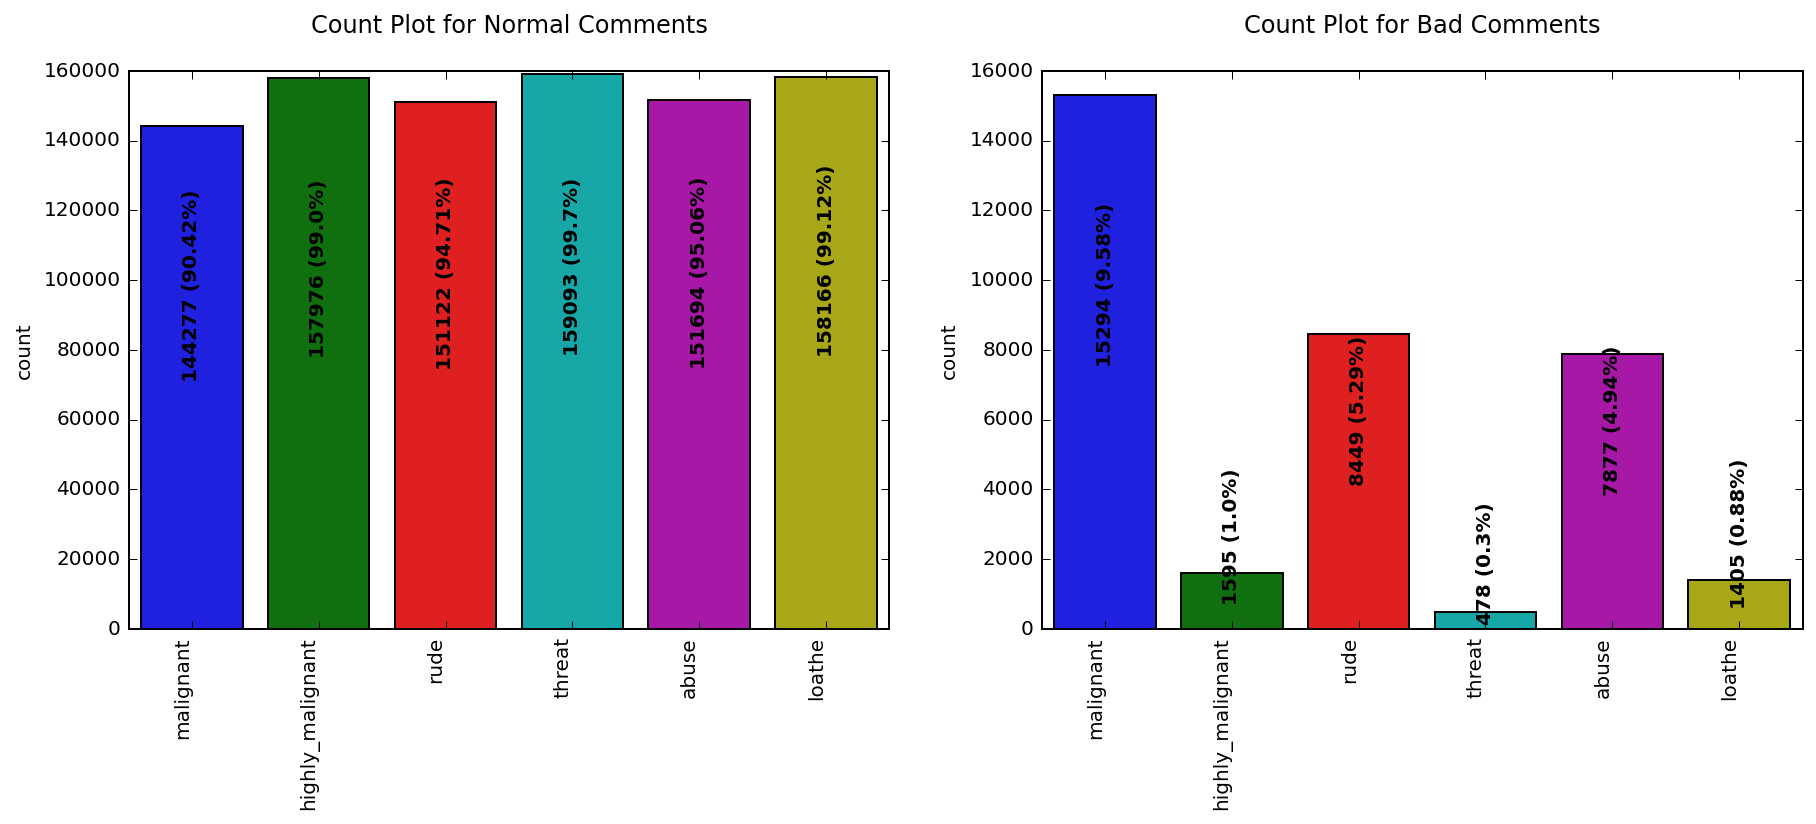

In [42]:
# comparing normal comments and bad comments using count plot

fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(2):
    sns.countplot(data=df[output_labels][df[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n")
    else:
        ax[i].set_title("Count Plot for Bad Comments\n")
        
    ax[i].set_xticklabels(output_labels, rotation=90, ha="right")
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

plt.show()

Observation:

Dataset consists of higher number of Normal Comments than Bad or Malignant Comments. Therefore, it is clear that dataset is imbalanced and needs to be handle accordingly.

Most of the bad comments are of type malignant while least number of type threat is present in dataset.

Majority of bad comments are of type malignant, rude and abuse.

Text(0.5, 0, 'Message Length')

Text(0.5, 0, 'Message Length')

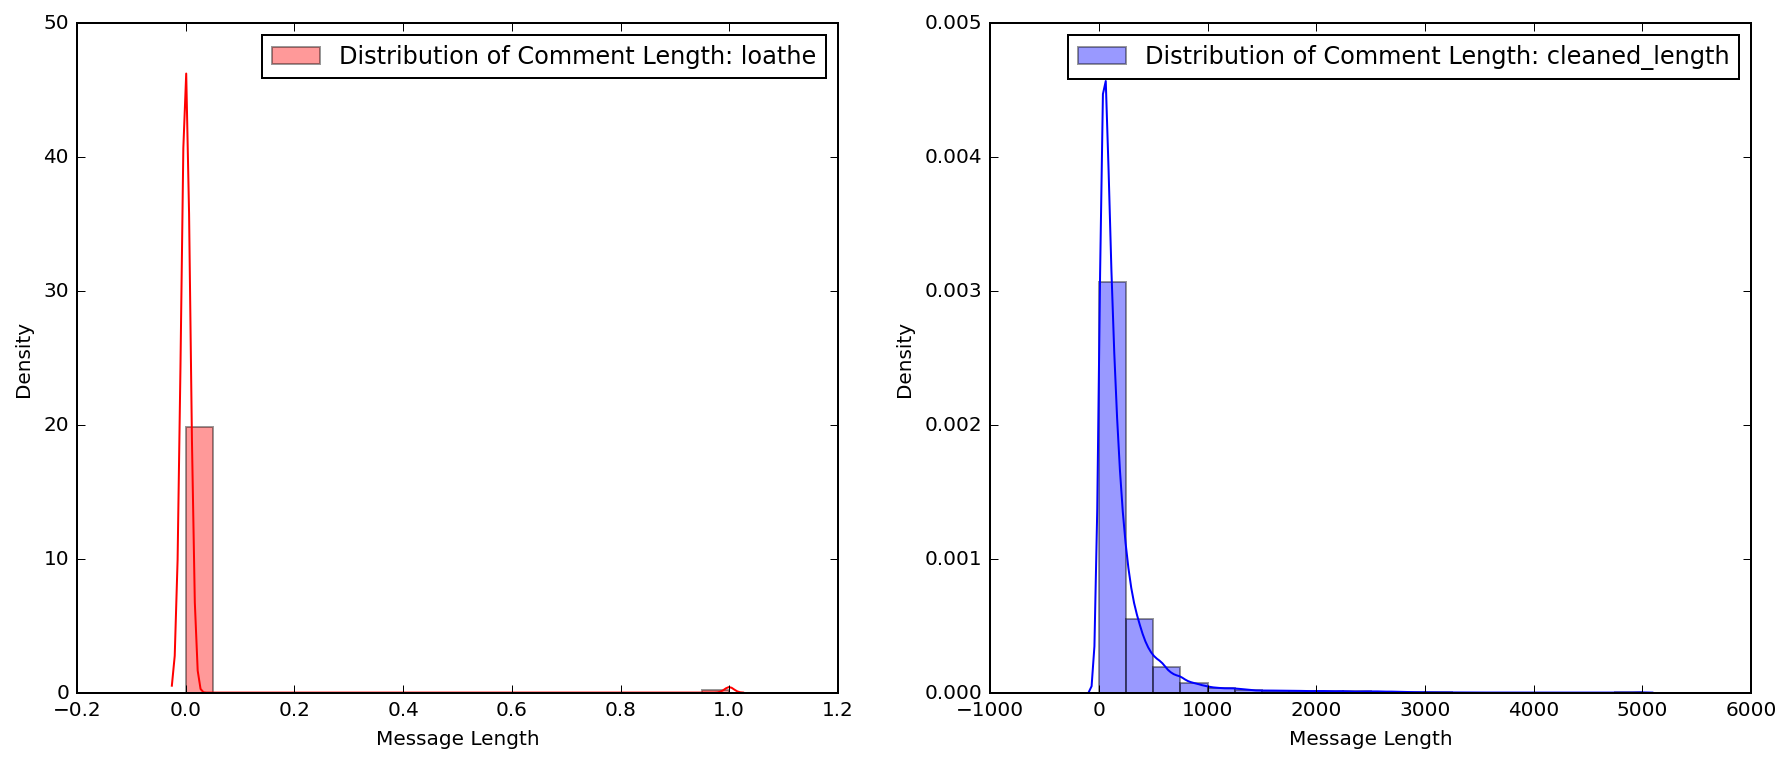

In [43]:
# Comparing the comment text length distribution before cleaning and after cleaning

fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['red','blue']
for i in df.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Message Length")
    ax[j].legend()
    j += 1
    
plt.show()

Before cleaning comment_text column most of the comment's length lies between 0 to 1100 while after cleaning it has been reduced between 0 to 900.


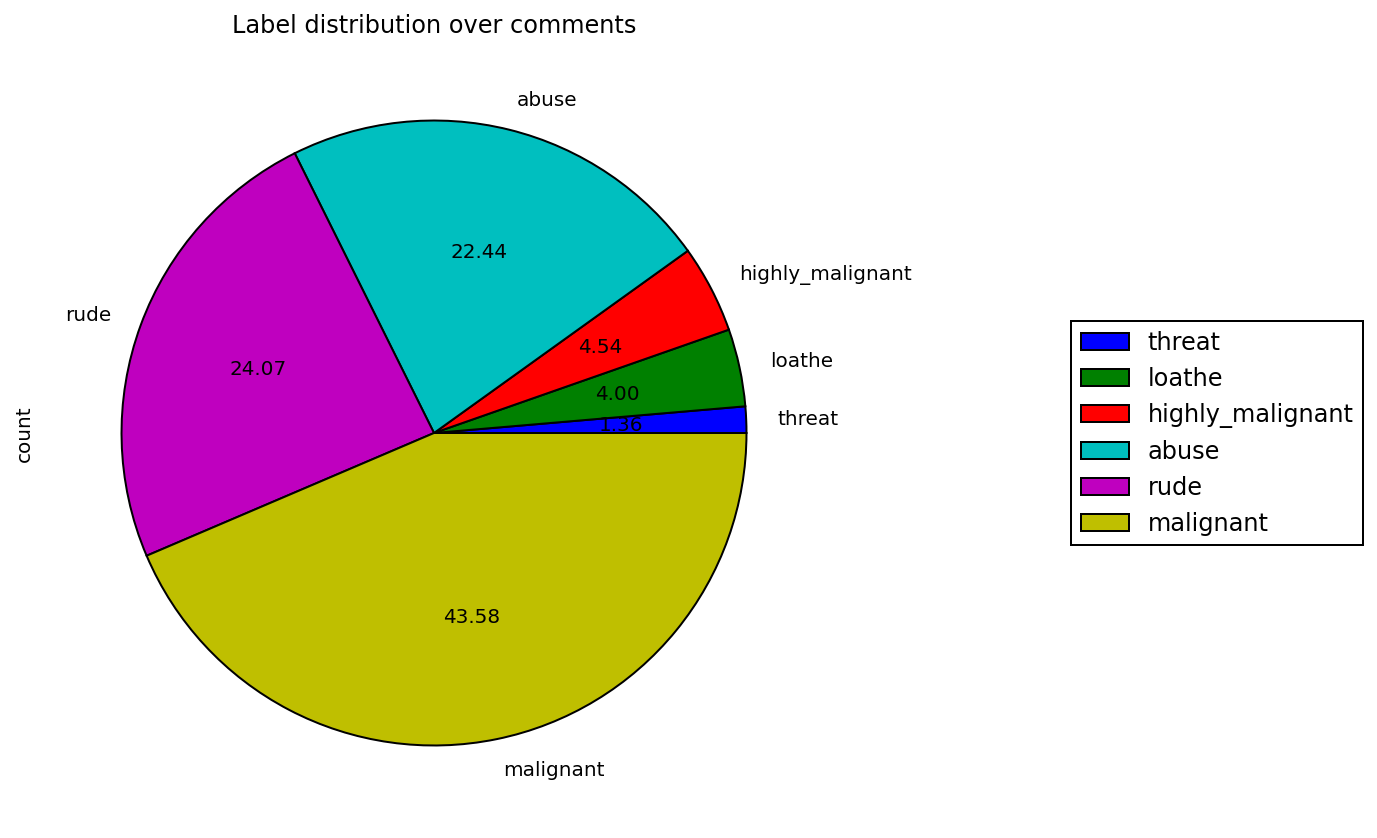

In [44]:
# Visualizing the label distribution of comments using pie chart

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (7, 7))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

<Figure size 1080x720 with 0 Axes>

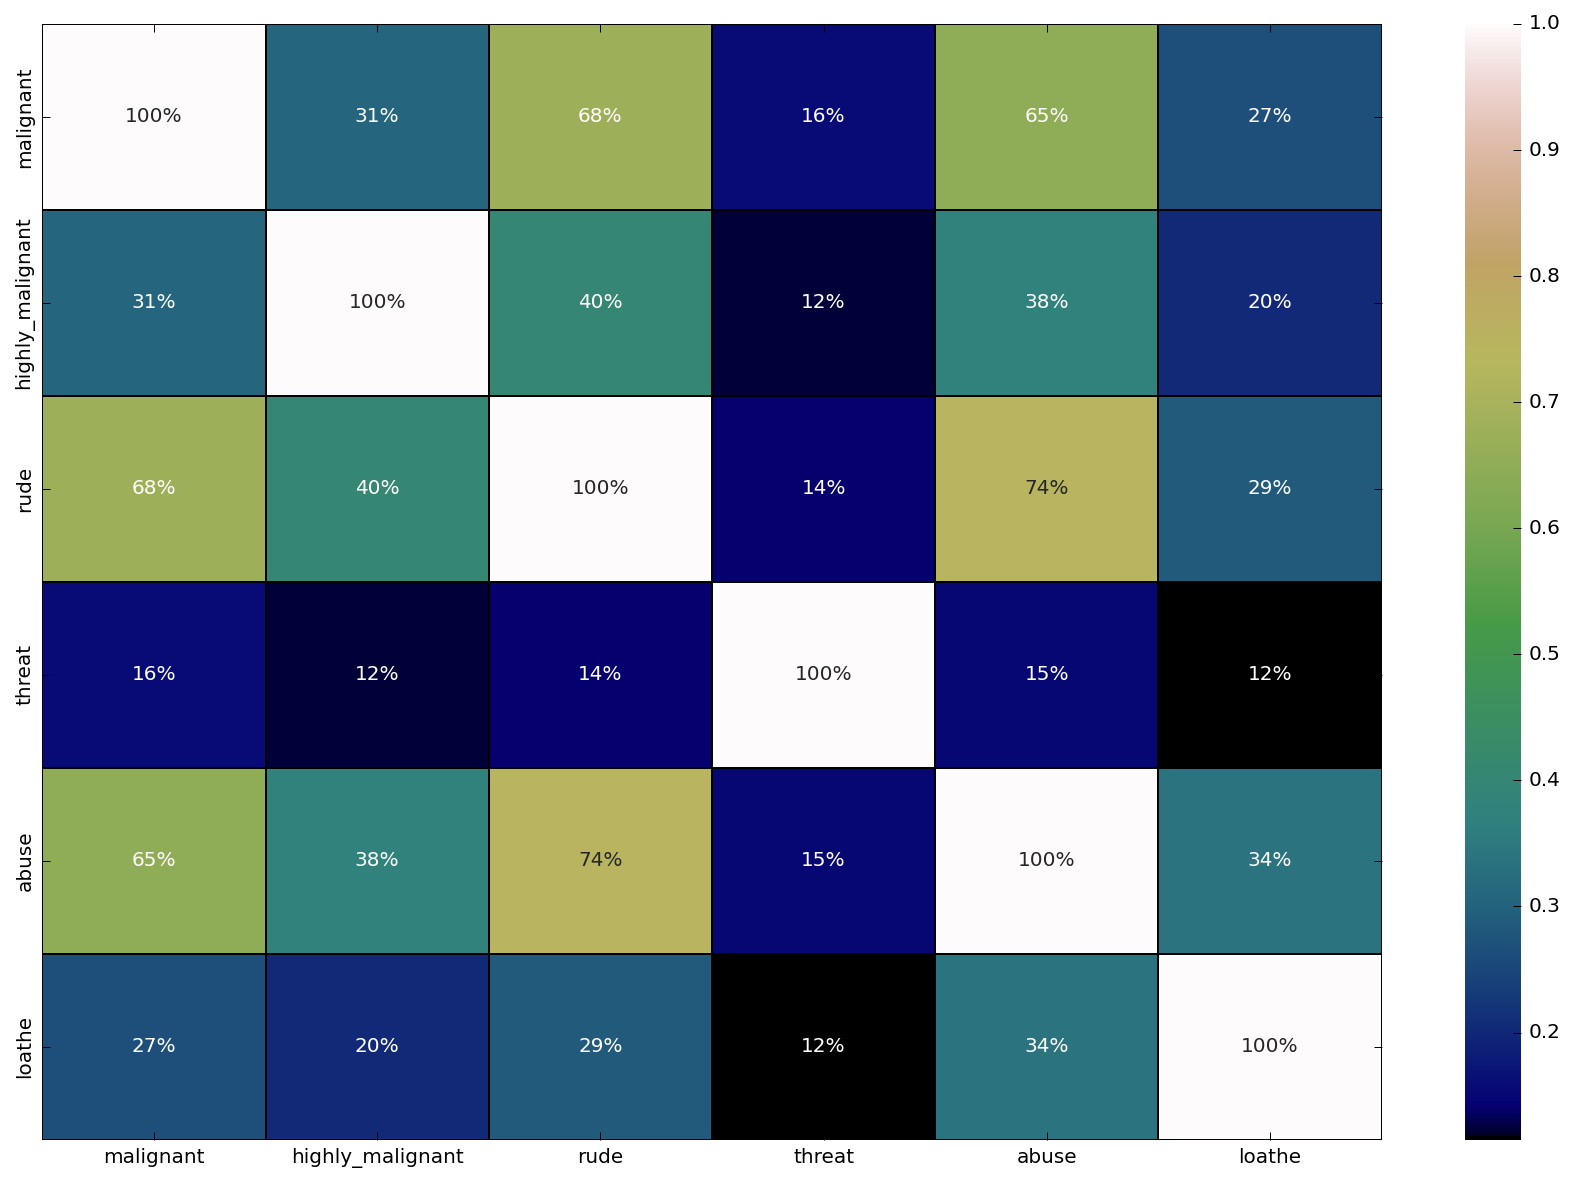

In [45]:
# Plotting heatmap for visualizing the correlation

plt.figure(figsize=(15, 10))
corr = df_train.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='gist_earth', annot=True)
plt.show()

Text(0.5, 1.0, 'WordCloud for malignant column')

[]

[]

Text(0.5, 1.0, 'WordCloud for highly_malignant column')

[]

[]

Text(0.5, 1.0, 'WordCloud for rude column')

[]

[]

Text(0.5, 1.0, 'WordCloud for threat column')

[]

[]

Text(0.5, 1.0, 'WordCloud for abuse column')

[]

[]

Text(0.5, 1.0, 'WordCloud for loathe column')

[]

[]

Text(0.5, 0.98, 'WordCloud: Representation of Loud words in BAD COMMENTS')

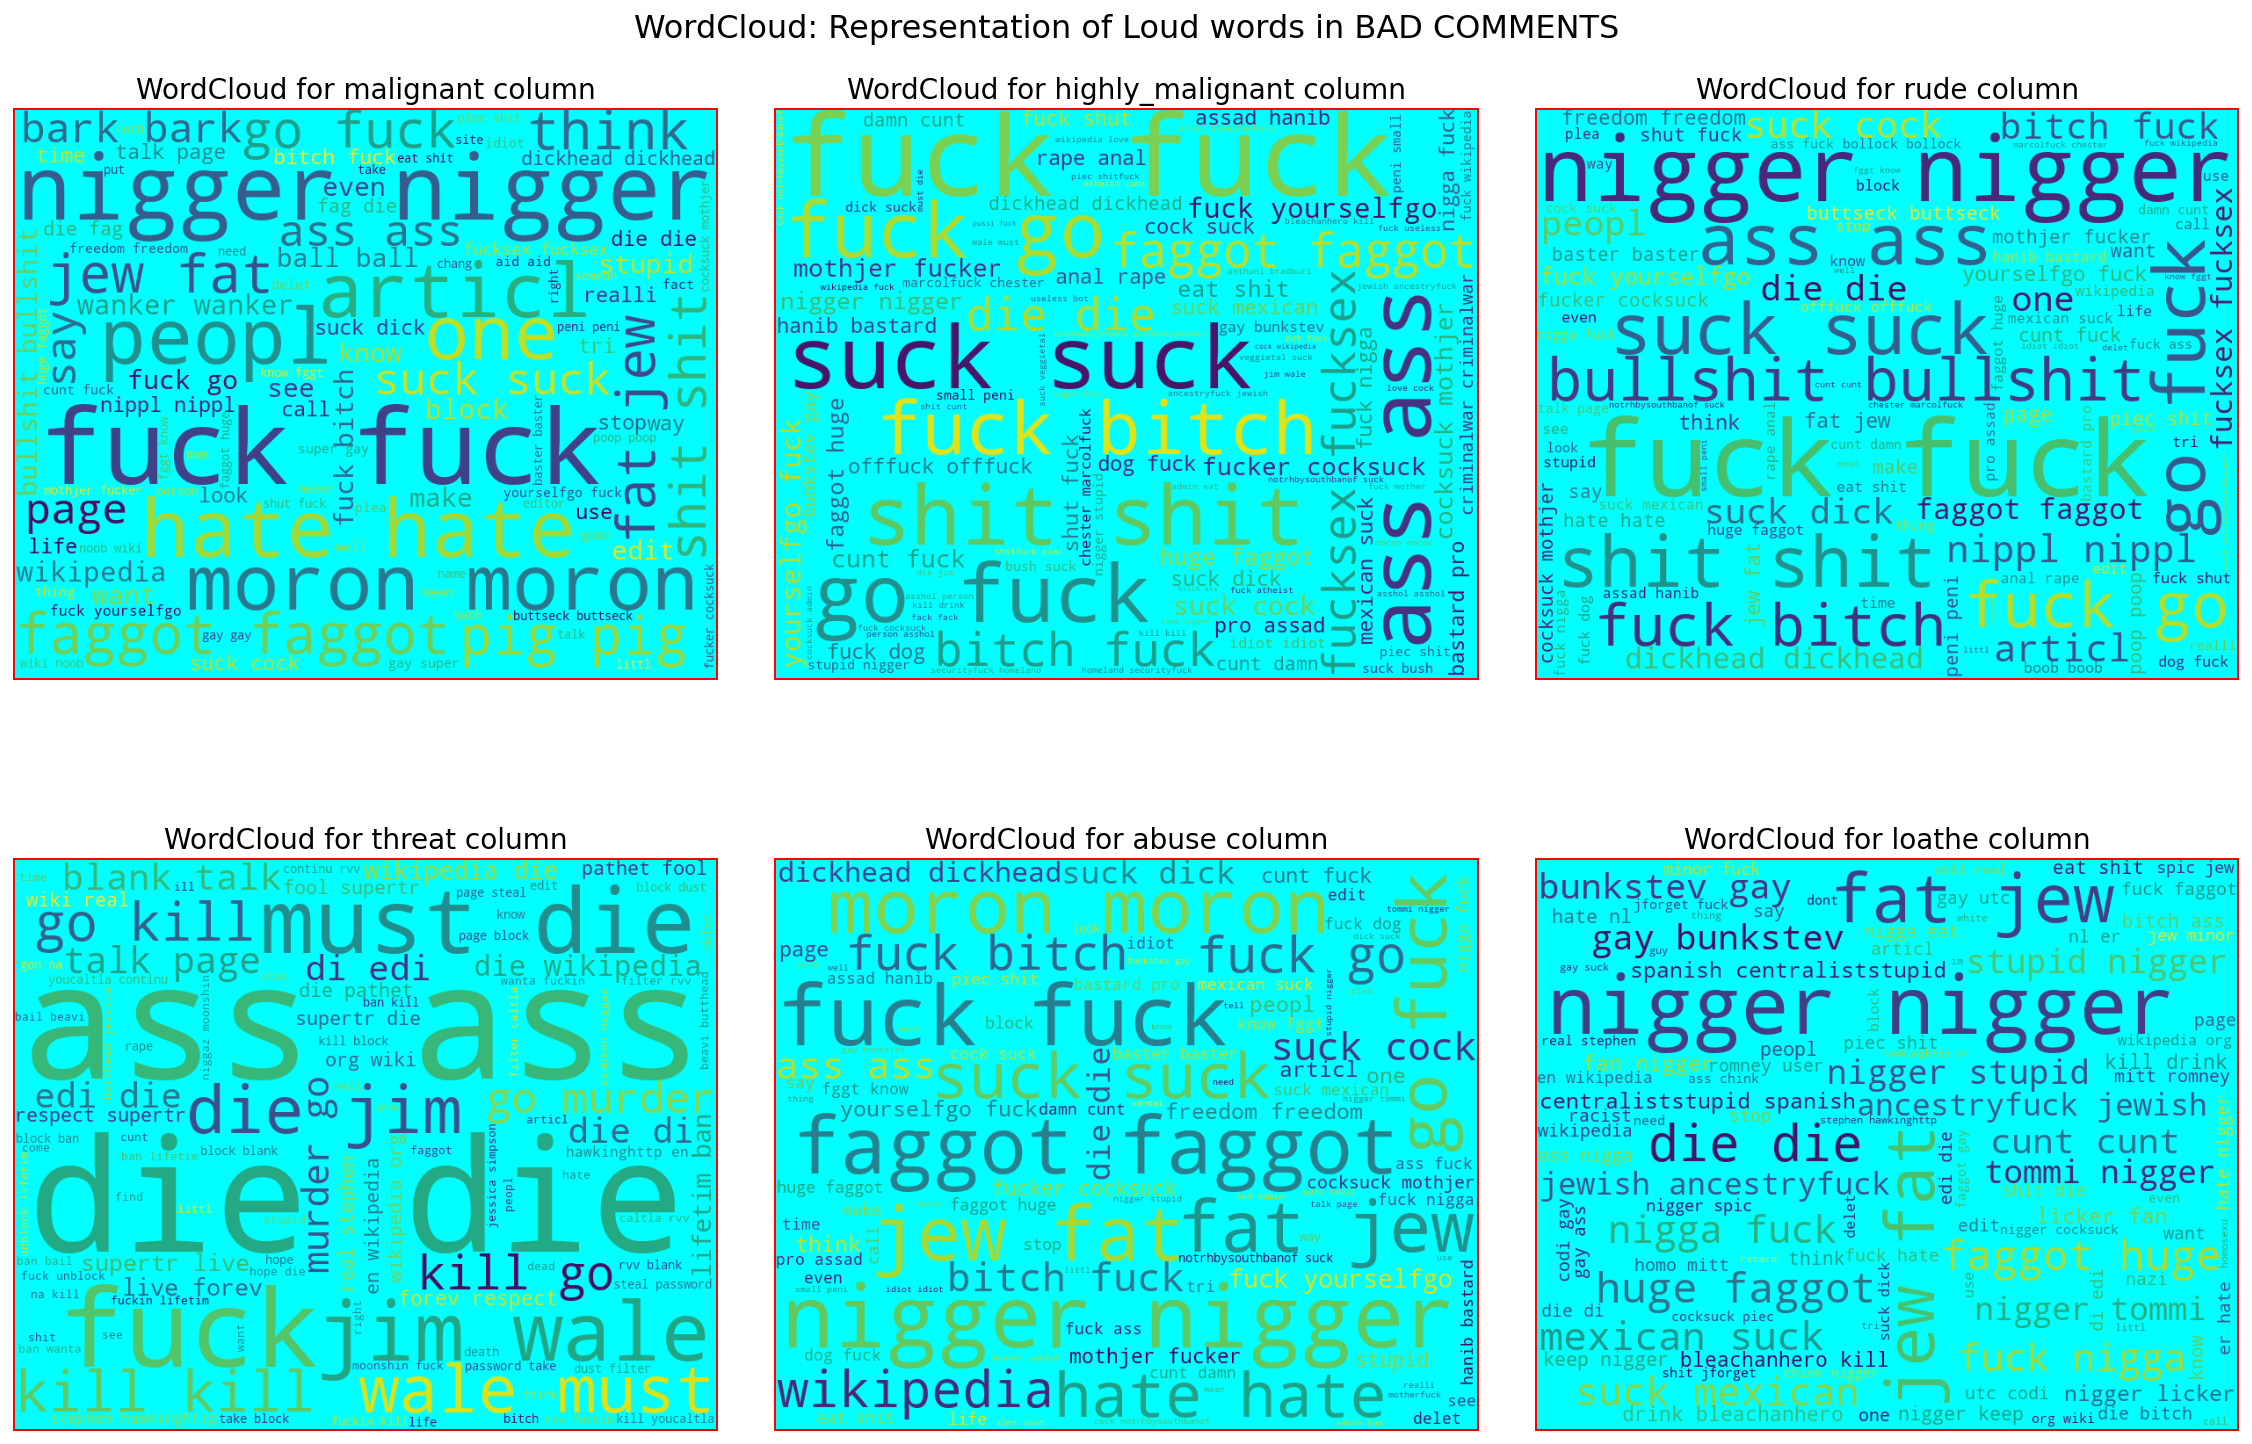

In [46]:
# WordCloud: Getting sense of loud words in each of the output labels.

cols = 3
rows = len(output_labels)//cols
if len(output_labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(16,rows*cols*1.8))
fig.subplots_adjust(top=0.8, hspace=0.3)

p=1
for i in output_labels:
    word_cloud = WordCloud(height=650, width=800,
                           background_color="aqua",max_words=100).generate(' '.join(df.comment_text[df[i]==1]))
    ax = fig.add_subplot(rows,cols,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for {i} column",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('red')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("WordCloud: Representation of Loud words in BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)
plt.show()

Observation:

From wordcloud of malignant comments, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.

From wordcloud of highly_malignant comments, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.

From wordcloud of rude comments, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.

From wordcloud of threat comments, it is clear that it mostly consists of words like die, must die, kill, murder etc.

From wordcloud of abuse comments, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.

From wordcloud of loathe comments, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

# Data Preparation for Model Training and Testing

In [47]:
# Convert text to Vectors

# Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df.comment_text).toarray()

# Checking the shape of features
features.shape

(159571, 4000)

In [48]:
# Seperating Input and Output Variables

# input variables
X = features

# output variables
Y = csr_matrix(df[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", X.shape)
print("Output Variable Shape:", Y.shape)

Input Variable Shape: (159571, 4000)
Output Variable Shape: (159571, 6)


# Classification Machine Learning Model building


In [49]:
# Training and Testing Model on our train dataset

# Creating a function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [50]:
# Preparing the list of models for classification purpose
models = {"GaussianNB": {"name": GaussianNB()},
          "MultinomialNB": {"name": MultinomialNB()},
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
          "Decision Tree Classifier": {"name": DecisionTreeClassifier()},
          "Bagging Classifier": {"name": BaggingClassifier(base_estimator=LinearSVC())},
         }

# Taking one forth of the total data for training and testing purpose
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/8 [00:00<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.21560957083175086
	Accuracy Score: 0.4729965818458033
              precision    recall  f1-score   support

           0       0.16      0.79      0.26      1281
           1       0.08      0.46      0.13       150
           2       0.11      0.71      0.19       724
           3       0.02      0.25      0.03        44
           4       0.10      0.65      0.17       650
           5       0.04      0.46      0.07       109

   micro avg       0.11      0.70      0.20      2958
   macro avg       0.08      0.55      0.14      2958
weighted avg       0.12      0.70      0.21      2958
 samples avg       0.05      0.07      0.05      2958
Completed in [14.117945201999987 sec.]

Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.02409

In [ ]:
# Preparing the list of models for classification purpose
models = {"GaussianNB": {"name": GaussianNB()},
          "MultinomialNB": {"name": MultinomialNB()},
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
          "Decision Tree Classifier": {"name": DecisionTreeClassifier()},
          "Bagging Classifier": {"name": BaggingClassifier(base_estimator=LinearSVC())},
         }

# Taking one forth of the total data for training and testing purpose
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/8 [00:00<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.21560957083175086
	Accuracy Score: 0.4729965818458033
              precision    recall  f1-score   support

           0       0.16      0.79      0.26      1281
           1       0.08      0.46      0.13       150
           2       0.11      0.71      0.19       724
           3       0.02      0.25      0.03        44
           4       0.10      0.65      0.17       650
           5       0.04      0.46      0.07       109

   micro avg       0.11      0.70      0.20      2958
   macro avg       0.08      0.55      0.14      2958
weighted avg       0.12      0.70      0.21      2958
 samples avg       0.05      0.07      0.05      2958
Completed in [13.191172838000057 sec.]

Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.02409

# Hyperparameter Tuning

In [51]:
# Choosing Linear Support Vector Classifier model

fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111]
             }
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3)
x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

GridSearchCV(cv=3, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             param_grid={'estimator__loss': ['hinge', 'squared_hinge'],
                         'estimator__multi_class': ['ovr', 'crammer_singer'],
                         'estimator__penalty': ['l1', 'l2'],
                         'estimator__random_state': [42, 72, 111]})

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

In [52]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', multi_class='ovr', penalty='l2', random_state=42))
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
h_loss = hamming_loss(y_test,fmod_pred)*100
print("Hamming loss for the Best Model is:", h_loss)

Accuracy score for the Best Model is: 91.51069518716578
Hamming loss for the Best Model is: 1.9593917112299464


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

# AUC ROC Curve for Final Model


<Figure size 720x576 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic (ROC) and Area under curve (AUC) for multiclass labels\n')

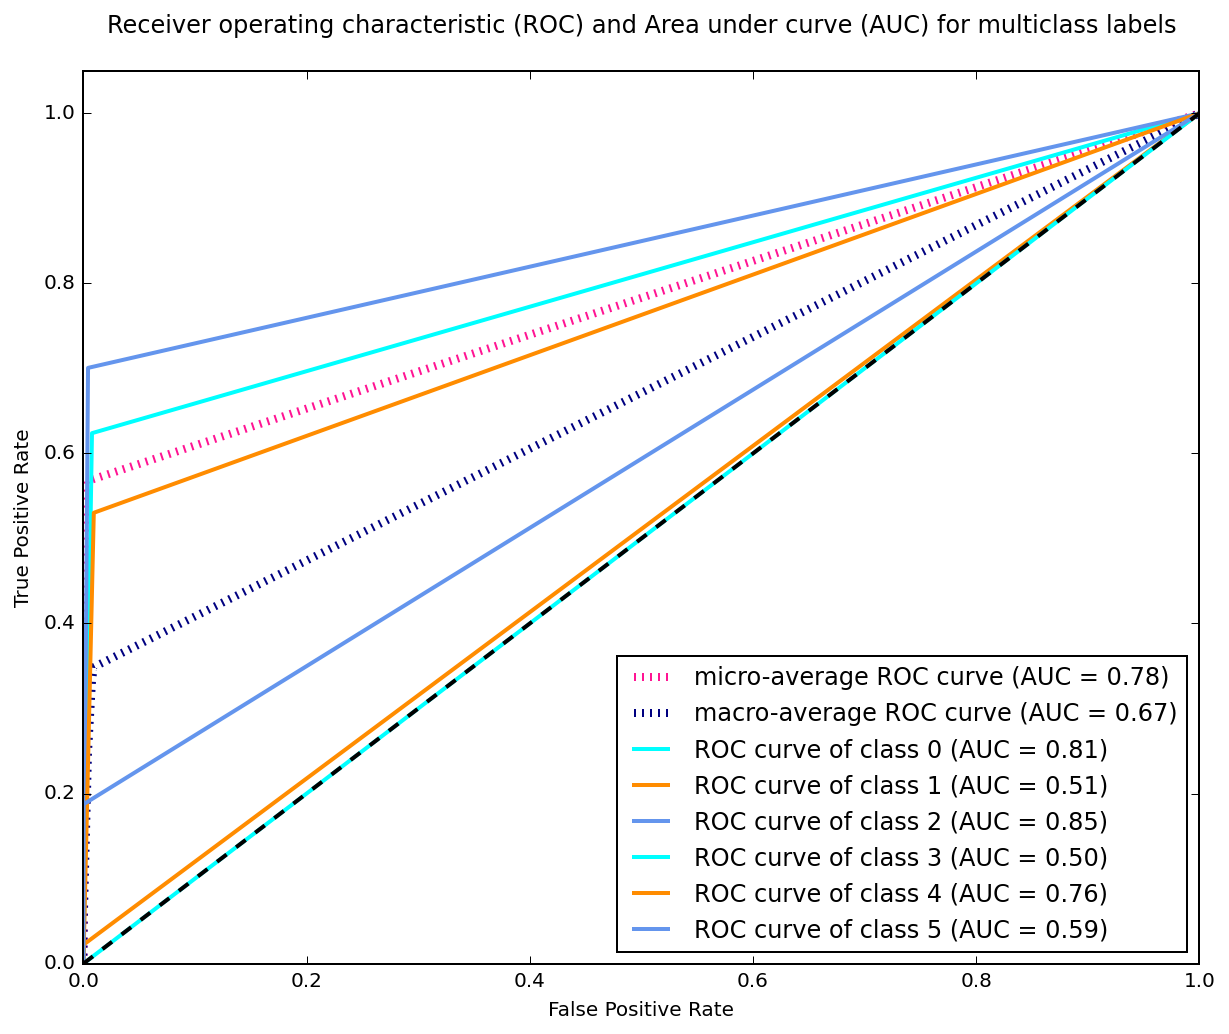

In [54]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], fmod_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), fmod_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) and Area under curve (AUC) for multiclass labels\n")
plt.legend(loc="lower right")
plt.show()

I have generated the ROC Curve for my final model and it shows separate curve for every class present in our multi label target variable along with it's AUC values.

# Confusion Matrix for Final Model

In [55]:
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, fmod_pred))

Confusion matrix:

 [[[10710    83]
  [  442   733]]

 [[11832     1]
  [  132     3]]

 [[11263    47]
  [  197   461]]

 [[11930     0]
  [   38     0]]

 [[11266   106]
  [  280   316]]

 [[11869     3]
  [   78    18]]]


Text(0.5, 1.0, 'Confusion Matrix for the Final Classification Model\n')

Text(0.5, 53.0, 'Predicted labels')

Text(71.0, 0.5, 'True labels')

[Text(0.5, 0, 'malignant'),
 Text(1.5, 0, 'highly_malignant'),
 Text(2.5, 0, 'rude'),
 Text(3.5, 0, 'threat'),
 Text(4.5, 0, 'abuse'),
 Text(0, 0, 'loathe')]

[Text(0, 0.5, 'malignant'),
 Text(0, 1.5, 'highly_malignant'),
 Text(0, 2.5, 'rude'),
 Text(0, 3.5, 'threat'),
 Text(0, 4.5, 'abuse'),
 Text(0, 0, 'loathe')]

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 <a list of 8 Text major ticklabel objects>)

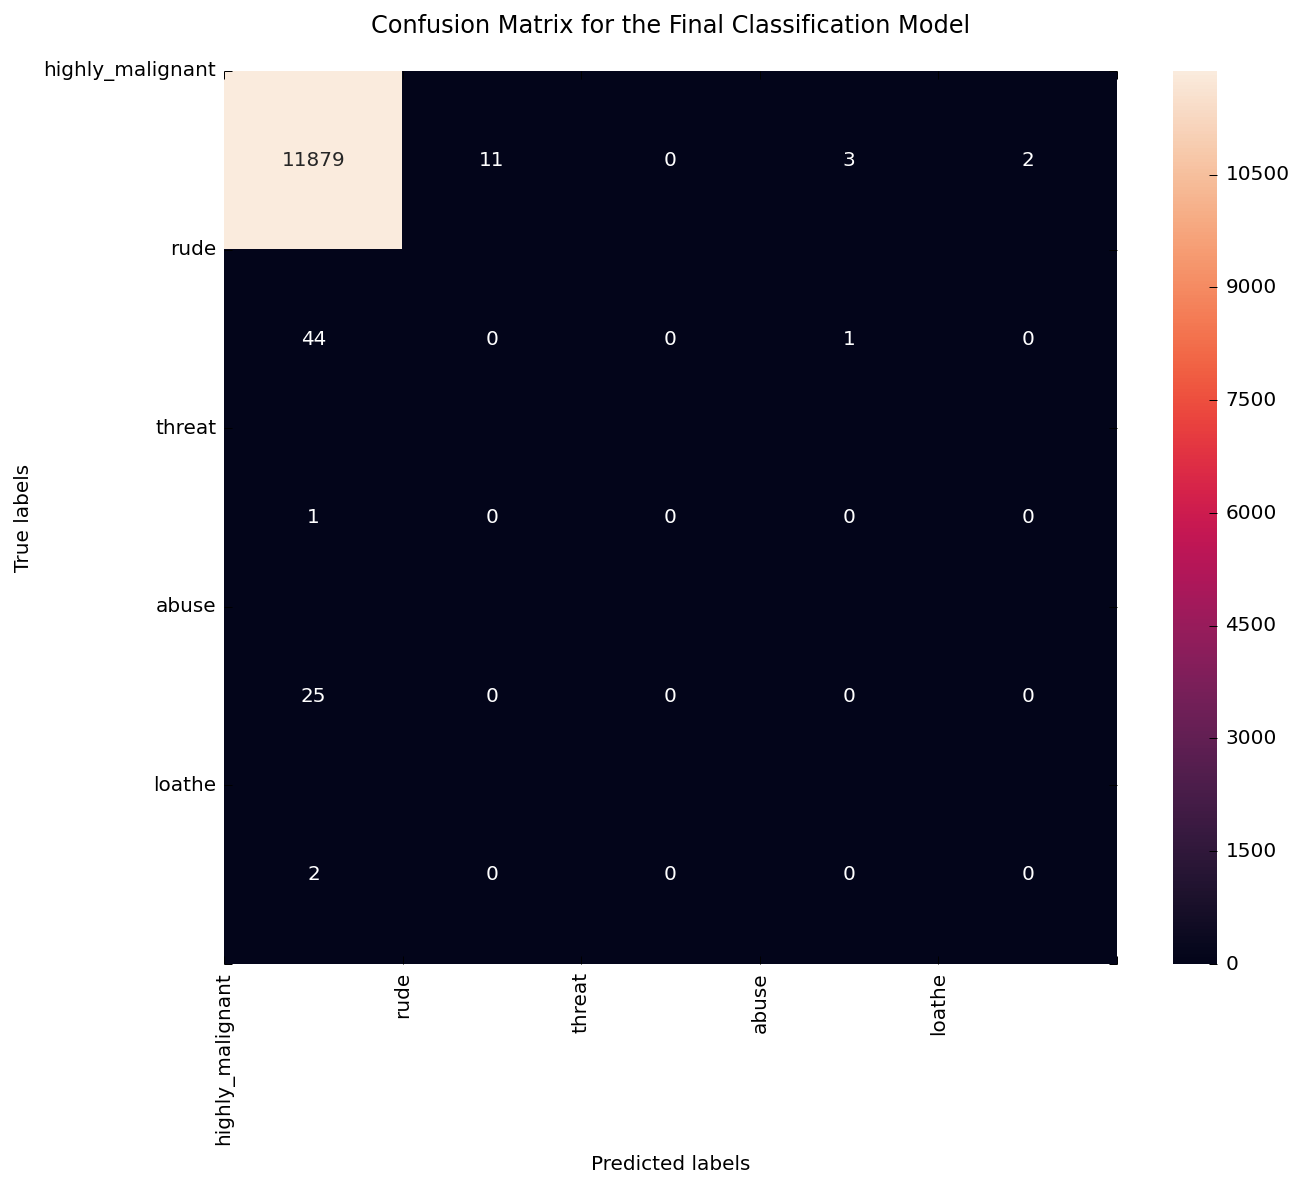

In [56]:
plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(fmod_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
loc = plticker.MultipleLocator()
ax.xaxis.set_major_locator(loc); ax.yaxis.set_major_locator(loc);
ax.set_xticklabels(comments_labels); ax.set_yticklabels(comments_labels);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()

With the help of above confusion matrix I am able to understand the number of times I got the correct outputs and the number of times my final model missed to provide the correct prediction (depicting in the black boxes).

# Model Saving or Serialization


In [57]:
# selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

# saving the best classification model
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

I am using the joblib option to save the final classification model but it can be done using pickle too.



# Preprocessing Pipeline for test dataframe

The following preprocessing pipeline is required to perform model prediction:

Use the test dataset

Remove null values if any

Drop column id

Convert comment text to lower case and replace '\n' with single space

Keep only text data ie. a-z' and remove other data from comment text

Remove stop words and punctuations

Apply Stemming using SnowballStemmer

Convert text to vectors using TfidfVectorizer

Load saved or serialized best model

Predict values and create a new CSV file

In [ ]:
# Remove null values
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)
    
# Drop coulmn id
df_test.drop(columns=['id'],inplace=True)

# Convert comment text to lower case and replace '\n' with single space
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

# Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Remove stopwords
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Remove punctuations
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

# Apply Stemming using SnowballStemmer
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(snb_stem.stem(word) for word in word_tokenize(x)))

print(df_test.info(memory_usage="deep"))

# Convert text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word', max_features=4000)
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

# Load saved or serialized model and predict
model_loaded = joblib.load('Malignant_comments_classifier.pkl')

# Make predictions and view the results
predict_test = model_loaded.predict(test_features)

# Saving predicted values into a CSV file
pd.DataFrame(predict_test.toarray()).to_csv('Predicted_test_output.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 1 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  153164 non-null  object
dtypes: object(1)
memory usage: 37.2 MB
None


In [ ]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)
df2=df_test.copy()
df = pd.concat([df2, df1], axis=1)
#df

In [ ]:
df.to_csv('test_dataset_predictions.csv', index=False)

## Inference
Starting with univariate analysis, with the help of count plot it was found that dataset is imbalanced with having higher number of records for normal comments than bad comments (including malignant, highly malignant, rude, threat, abuse and loathe). Also, with the help of distribution plot for comments length it was found that after cleaning most of comments length decreases from range 0-1100 to 0-900. Moving further with wordcloud it was found that malignant comments consists of words like fuck, nigger, moron, hate, suck etc. highly_malignant comments consists of words like ass, fuck, bitch, shit, die, suck, faggot etc. rude comments consists of words like nigger, ass, fuck, suck, bullshit, bitch etc. threat comments consists of words like die, must die, kill, murder etc. abuse comments consists of words like moron, nigger, fat, jew, bitch etc. and loathe comments consists of words like nigga, stupid, nigger, die, gay, cunt etc.


Problems faced while working in this project:

More computational power was required as it took more than 2 hours
Imbalanced dataset and bad comment texts
Good parameters could not be obtained using hyperparameter tuning as time was consumed more
Areas of improvement:
Could be provided with a good dataset which doesnot take more time.
Less time complexity
Providing a proper balanced dataset with less errors.
My point of view from my project is that we need to use proper words which are respectful and also avoid using abusive, vulgar and worst words in social media. It can cause many problems which could affect our lives. Try to be polite, calm and composed while handling stress and negativity and one of the best solution is to avoid it and overcoming in a positive manner.

 